In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
df = pd.read_csv ('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
df.info ()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
df.Drug.value_counts()


Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [6]:
df.Sex.value_counts()

Sex
M    104
F     96
Name: count, dtype: int64

In [7]:
df.BP.value_counts()

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

In [8]:
df.Cholesterol.value_counts()

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

In [9]:
df.describe ()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


Age skewness:  0.03030835703000607
Na to K skewness:  1.039341186028881


/var/folders/m1/rzb2dybj47n4nyft9hh0fx200000gp/T/ipykernel_74764/2276863066.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age']);


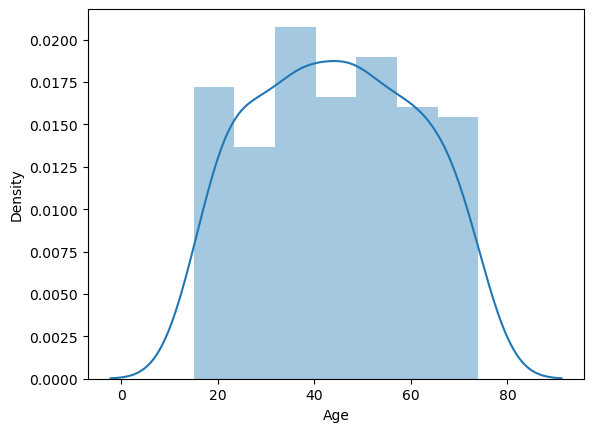

In [10]:
skewAge = df.Age.skew(axis = 0, skipna = True)
print('Age skewness: ', skewAge)

skewNatoK = df.Na_to_K.skew(axis = 0, skipna = True)
print('Na to K skewness: ', skewNatoK)

sns.distplot(df['Age']);


/var/folders/m1/rzb2dybj47n4nyft9hh0fx200000gp/T/ipykernel_74764/2159397142.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot (df['Na_to_K']);


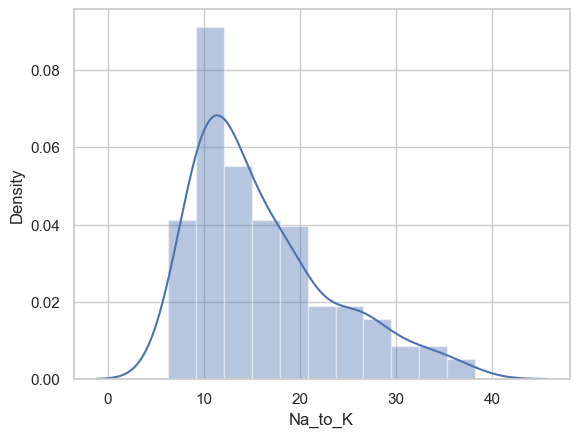

In [14]:
sns.distplot (df['Na_to_K']);

/var/folders/m1/rzb2dybj47n4nyft9hh0fx200000gp/T/ipykernel_74764/1459845261.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Drug", data=df, palette="pastel")


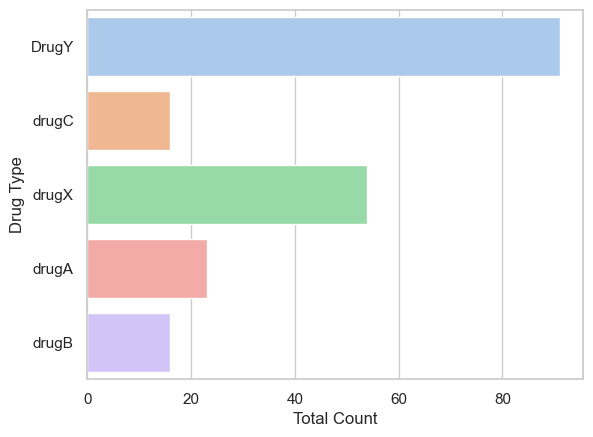

In [12]:
# Drug Type Distribution 

sns.set_theme (style="whitegrid")
sns.countplot(y="Drug", data=df, palette="pastel")
plt.ylabel ('Drug Type')
plt.xlabel ('Total Count')
plt.show()


/var/folders/m1/rzb2dybj47n4nyft9hh0fx200000gp/T/ipykernel_74764/2203214212.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sex", data=df, palette="flare")


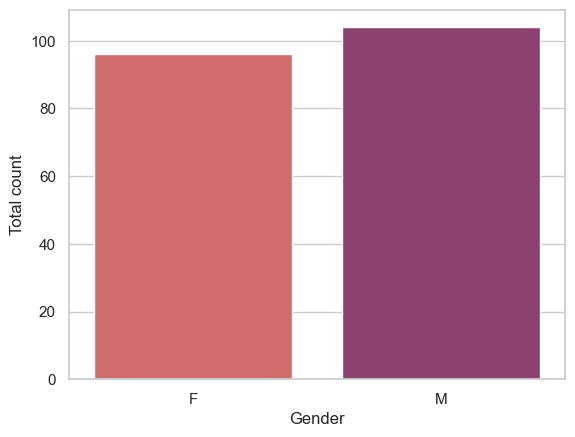

In [15]:
# Gender Distribution

sns.set_theme(style="whitegrid")
sns.countplot(x="Sex", data=df, palette="flare")
plt.xlabel('Gender')
plt.ylabel('Total count')
plt.show()


/var/folders/m1/rzb2dybj47n4nyft9hh0fx200000gp/T/ipykernel_74764/3273797512.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot (y="BP", data=df, palette ="crest")


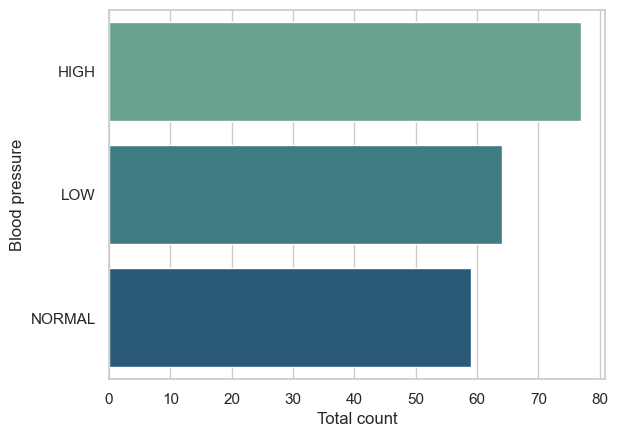

In [16]:
# Blood Pressure Distribution

sns.set_theme (style="whitegrid")
sns.countplot (y="BP", data=df, palette ="crest")
plt.ylabel ('Blood pressure')
plt.xlabel ('Total count')
plt.show()

/var/folders/m1/rzb2dybj47n4nyft9hh0fx200000gp/T/ipykernel_74764/1371603609.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot (x="Cholesterol", data=df, palette= "rocket")


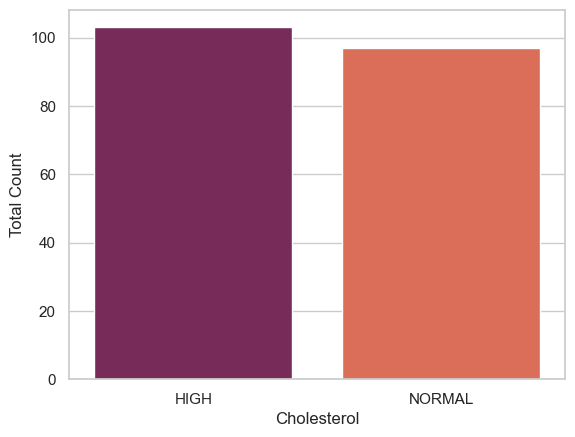

In [17]:
# Cholestrol Distribution

sns.set_theme (style = "whitegrid")
sns.countplot (x="Cholesterol", data=df, palette= "rocket")
plt.xlabel ('Cholesterol')
plt.ylabel ('Total Count')
plt.show ()

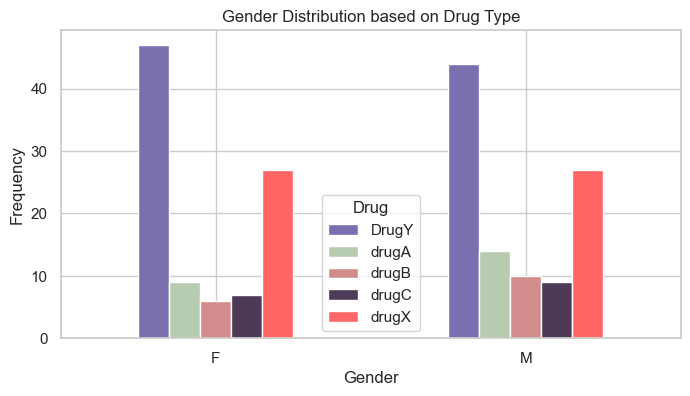

In [18]:
# Gender Distribution based on Drug Type

pd.crosstab (df.Sex, df.Drug).plot(kind="bar", figsize =(8,4), color=['#7b6faf','#b7cbb1','#d28c8c', '#4c3a57','#ff6666'])
plt.title ('Gender Distribution based on Drug Type')
plt.xlabel ('Gender')
plt.xticks(rotation=0)

plt.ylabel ('Frequency')

plt.show()

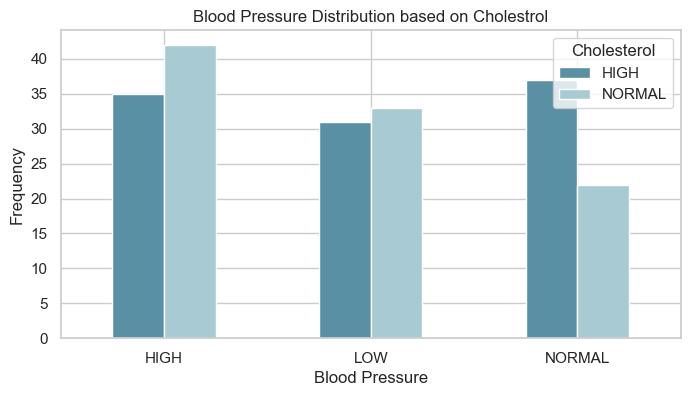

In [19]:
# Blood Pressure Distribution based on Cholestrol
pd.crosstab(df.BP,df.Cholesterol).plot(kind="bar",figsize=(8,4),color=['#5990a4','#a8cad3'])

plt.title ('Blood Pressure Distribution based on Cholestrol')
plt.xlabel ('Blood Pressure')
plt.xticks(rotation=0)

plt.ylabel ('Frequency')  
plt.show()                      

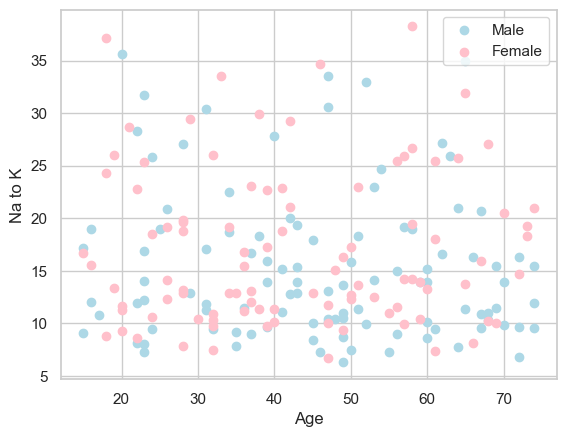

In [20]:
# Sodium to Potassium Distribution based on Gender + Age

plt.scatter (x=df.Age [df.Sex=='M'], y=df.Na_to_K [(df.Sex=='M')], c="lightblue")
plt.scatter (x=df.Age [df.Sex=='F'], y=df.Na_to_K [(df.Sex=='F')], c="pink")
plt.legend (['Male','Female'])
plt.xlabel ("Age")
plt.ylabel ("Na to K")
plt.show()

In [8]:
df = pd.read_csv ('drug200.csv')

bin_age = [0, 19, 29, 39, 49, 59, 69, 80]
category_age = ['<20s', '20s', '30s', '40s', '50s', '60s', '>60s']

df['Age_binned'] = pd.cut(df['Age'], bins=bin_age, labels=category_age)
df = df.drop(['Age'], axis=1)

In [9]:
bin_NatoK = [0, 9, 19, 29, 50]
category_NatoK = ['<10', '10-20', '20-30', '>30']
df['Na_to_K_binned'] = pd.cut(df['Na_to_K'], bins=bin_NatoK, labels=category_NatoK)
df = df.drop(['Na_to_K'], axis = 1)


In [11]:
X = df.drop(["Drug"], axis=1)
y = df["Drug"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [16]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

X_train.head()


,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>60s,Na_to_K_binned_<10,Na_to_K_binned_10-20,Na_to_K_binned_20-30,Na_to_K_binned_>30
131,False,True,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True
96,True,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True
181,True,False,False,False,True,True,False,False,False,False,False,True,False,False,False,True,False,False
19,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False
153,True,False,False,True,False,False,True,False,False,False,False,False,False,True,False,True,False,False


In [15]:
X_test.head()


,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>60s,Na_to_K_binned_<10,Na_to_K_binned_10-20,Na_to_K_binned_20-30,Na_to_K_binned_>30
18,False,True,False,True,False,True,False,False,True,False,False,False,False,False,True,False,False,False
170,True,False,False,False,True,True,False,False,True,False,False,False,False,False,False,True,False,False
107,False,True,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False
98,False,True,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True
177,False,True,False,False,True,True,False,False,True,False,False,False,False,False,False,False,True,False


In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in X_train.columns:
    if X_train[col].dtype == 'object' or X_train[col].dtype == 'bool':
        X_train[col] = le.fit_transform(X_train[col].astype(str))


/var/folders/m1/rzb2dybj47n4nyft9hh0fx200000gp/T/ipykernel_75298/2880599096.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=y_train, data=df, palette="mako_r")


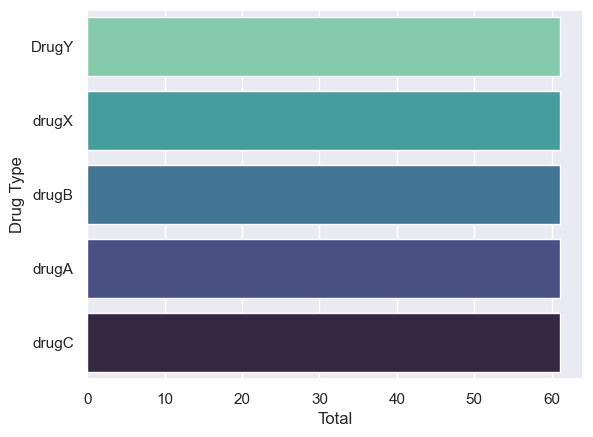

In [24]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

sns.set_theme(style="darkgrid")
sns.countplot(y=y_train, data=df, palette="mako_r")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()


In [35]:
LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
plt.savefig("LRconfusion_matrix.png")

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))


              precision    recall  f1-score   support

       DrugY       1.00      0.70      0.82        30
       drugA       0.71      1.00      0.83         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18

    accuracy                           0.85        60
   macro avg       0.79      0.94      0.84        60
weighted avg       0.89      0.85      0.85        60

[[21  2  1  2  4]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]
Logistic Regression accuracy is: 85.00%


<Figure size 640x480 with 0 Axes>

In [36]:
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=20)
DTclassifier.fit(X_train, y_train)

y_pred = DTclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

plt.savefig("DTconfusion_matrix.png")
DTAcc = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc*100))


              precision    recall  f1-score   support

       DrugY       0.89      0.57      0.69        30
       drugA       0.56      1.00      0.71         5
       drugB       0.60      1.00      0.75         3
       drugC       0.57      1.00      0.73         4
       drugX       0.80      0.89      0.84        18

    accuracy                           0.75        60
   macro avg       0.68      0.89      0.75        60
weighted avg       0.80      0.75      0.75        60

[[17  4  2  3  4]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 2  0  0  0 16]]
Decision Tree accuracy is: 75.00%


<Figure size 640x480 with 0 Axes>

In [37]:
RFclassifier = RandomForestClassifier(max_leaf_nodes=30)
RFclassifier.fit(X_train, y_train)

y_pred = RFclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
plt.savefig("RFconfusion_matrix.png")
from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

              precision    recall  f1-score   support

       DrugY       1.00      0.67      0.80        30
       drugA       0.62      1.00      0.77         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18

    accuracy                           0.83        60
   macro avg       0.77      0.93      0.83        60
weighted avg       0.88      0.83      0.83        60

[[20  3  1  2  4]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]
Random Forest accuracy is: 83.33%


<Figure size 640x480 with 0 Axes>

In [28]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
                        'Accuracy' : [LRAcc*100, DTAcc*100, RFAcc*100]})
compare.sort_values (by='Accuracy', ascending = False)

,Model,Accuracy
0,Logistic Regression,85.000000
2,Random Forest,83.333333
1,Decision Tree,75.000000


In [30]:
import joblib

joblib.dump(LRclassifier, "LRclassifier.pkl")
joblib.dump(DTclassifier, "DTclassifier.pkl")
joblib.dump(RFclassifier, "RFclassifier.pkl")


['RFclassifier.pkl']

In [39]:
import streamlit as st
import joblib
import pandas as pd
import numpy as np


logreg = joblib.load("LRclassifier.pkl")
dt = joblib.load("DTclassifier.pkl")
rf = joblib.load("RFclassifier.pkl")

# Title
st.title("💊 Drug Recommendation Predictor")

# Sidebar for input
st.sidebar.header("Patient Information")

age = st.sidebar.slider("Age", 15, 75, 35)
sex = st.sidebar.selectbox("Sex", ["Male", "Female"])
bp = st.sidebar.selectbox("Blood Pressure", ["LOW", "NORMAL", "HIGH"])
chol = st.sidebar.selectbox("Cholesterol", ["NORMAL", "HIGH"])
na_to_k = st.sidebar.slider("Sodium to Potassium Ratio", 5.0, 40.0, 15.0)

# Convert to DataFrame
input_df = pd.DataFrame({
    "Age": [age],
    "Sex": [1 if sex == "Male" else 0],
    "BP": [bp],
    "Cholesterol": [chol],
    "Na_to_K": [na_to_k]
})

bp_map = {"LOW": 0, "NORMAL": 1, "HIGH": 2}
chol_map = {"NORMAL": 0, "HIGH": 1}
input_df["BP"] = input_df["BP"].map(bp_map)
input_df["Cholesterol"] = input_df["Cholesterol"].map(chol_map)

# Prediction
st.subheader("Select a model to predict the drug")
model_choice = st.radio("Model", ["Logistic Regression", "Decision Tree", "Random Forest"])

if st.button("Predict Drug"):
    if model_choice == "Logistic Regression":
        prediction = logreg.predict(input_df)
    elif model_choice == "Decision Tree":
        prediction = dt.predict(input_df)
    else:
        prediction = rf.predict(input_df)

    st.success(f"Recommended Drug: **{prediction[0]}** 💊")

# Model Performance (static for now, unless you upload charts)
st.subheader("📊 Model Accuracy Comparison")
st.markdown("""
- **Logistic Regression**: 85%
- **Decision Tree**: 83.3%
- **Random Forest**: 75%
""")



2025-06-12 23:58:37.769 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-12 23:58:37.775 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-12 23:58:37.777 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-12 23:58:37.779 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-12 23:58:37.780 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-12 23:58:37.783 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-12 23:58:37.797 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-12 23:58:37.811 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [41]:
!streamlit run app.py


Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py
